# Homework 4 Part 1

This is an individual assignment.

---

Write your answers using markdown cells or embed handwritten answers with ```IPython.display.Image```.

<div class="alert alert-info">
    <b>Reading Assignment</b>
    
To best prepare for this assignment, read [chapter 6 from the textbook "Introduction to Machine Learning" by Ethem Alpaydin](https://ebookcentral.proquest.com/lib/ufl/reader.action?docID=3339851), available in Course Reserves.

</div>

---

# Exercise 1 (10 points)

**Propose an objective function that incorporates class information into PCA such that instances of the same class are mapped to nearby locations in the new space. You do not have to solve for a solution, but must explain all terms and their function.**



$$\arg\max_W J(W) = \text{tr}(W^T S_T W) - \lambda \text{tr}(W^T S_W W)$$

where:
- $W$ is the projection matrix (columns are projection vectors)
- $\text{tr}(·)$ is the trace operator (sum of diagonal elements)
- $S_T$ is the total scatter matrix = $\sum_{i=1}^n (x_i - \mu)(x_i - \mu)^T$
- $S_W$ is the within-class scatter matrix = $\sum_{c=1}^C \sum_{i \in c} (x_i - \mu_c)(x_i - \mu_c)^T$
- $\lambda$ is the penalty parameter
- $\mu$ is global mean
- $\mu_c$ is mean of class $c$


The main term $\text{tr}(W^T S_T W)$ maximizes the overall variance in the projected space, preserves PCA's fundamental goal of maintaining data spread, and prevents the collapse of projections to a single point.

The penalty term $\text{tr}(W^T S_W W)$ penalizes large within-class scatter, encourages points from the same class to project closer together in the reduced space, and acts as a regularizer for class-based clustering.

The penalty parameter $\lambda$ controls the strength of the penalty term. A larger $\lambda$ value imposes a stronger penalty on within-class scatter, forcing same-class points closer together, while a smaller $\lambda$ makes the objective function behave more like standard PCA.

This objective function effectively extends PCA by adding a class-aware penalty term, creating a supervised dimensionality reduction method.

---

# Exercise 2 (10 points)

**A neural network has a “skip-ahead” connection where the layers $i \rightarrow j \rightarrow k \rightarrow l$ are augmented with a direct connection from $i \rightarrow l$. If the layer weights (fully connected) are denoted by $w_{ij}^{(1)}, w_{jk}^{(2)}, w_{kl}^{(3)}$. Write down the function being constructed assuming a one to one correspondence between the neurons in layers $i$ and $l$. Using the chain rule of differentiation explain how the skip-ahead connection works in neural networks. Assume sigmoid activation functions and draw a picture to further clarify your explanation. [Note: Approximate solutions are required.]**

<img src="figures/skip-ahead-connection.png" alt="Skip-Ahead Connection" width="500">

Denote:
- $\sigma(x)$ as the sigmoid activation function: $\sigma(x) = 1/(1 + e^{(-x)})$
- $x_i$ as the input from layer $i$
- The skip connection weight as $w_{il}^{(\text{skip})}$

The function being constructed can be written as:

For the regular path $(i → j → k → l)$:
- $h_j = \sigma(w_{ij}^{(1)}x_i)$
- $h_k = \sigma(w_{jk}^{(2)}h_j)$
- $h_l^{regular} = \sigma(w_{kl}^{(3)}h_k)$

For the skip connection $(i → l)$: $h_l^{skip} = \sigma(w_{il}^{skip}x_i)$

The final output at layer $l$ combines both paths: $h_l = h_l^{regular} + h_l^{skip}$

Therefore the regular path gradient is:
$$\frac{\partial E}{\partial w_{ij}^{(1)}} = \frac{\partial E}{\partial h_l} \cdot \frac{\partial h_l}{\partial h_k} \cdot \frac{\partial h_k}{\partial h_j} \cdot \frac{\partial h_j}{\partial w_{ij}^{(1)}}$$

The skip connection gradient is:
$$\frac{\partial E}{\partial w_{il}^{skip}} = \frac{\partial E}{\partial h_l} \cdot \frac{\partial h_l}{\partial w_{il}^{skip}}$$

This helps us understand that the skip connection provides a more direct linear path for information flow, while the regular path allows for more complex non-linear transformations.

---

# Exercise 3 (10 points)

**3. Consider the sum of squares error function written as
\begin{align*} 
E\left(w, w_{0}\right)=\frac{1}{2} \sum_{n}\left(t_{n}-w^{T} x_{n}-w_{0}\right)^{2}
\end{align*}
where the set of target values $\left\{t_{n}\right\}$ are assigned as follows: $t_{n}=\frac{N}{N_{1}}$ for class 1 with $N_{1}$ being the cardinality of class 1 patterns and $t_{n}=-\frac{N}{N_{2}}$ for class 2 with $N_{2}$ being the cardinality of class 2 patterns. (The total number of training set patterns is $N$.) Show that for this choice of $\left\{t_{n}\right\}$, the least-squares and Fisher Linear Discriminant (FLD) solutions concide. [Hint: read Bishop textbook Chapter 4 - Discriminant functions]**

Proof that Least-Squares and FLD Solutions Coincide



   $$E(w,w_0) = \frac{1}{2}\sum_n(t_n - w^Tx_n - w_0)^2$$
   $$\frac{\partial E}{\partial w} = -\sum_n(t_n - w^Tx_n - w_0)x_n = 0$$
   $$\frac{\partial E}{\partial w_0} = -\sum_n(t_n - w^Tx_n - w_0) = 0$$

For class 1 (C₁):
   $$t_n = \frac{N}{N_1}, \quad n \in C_1$$

For class 2 (C₂):
   $$t_n = -\frac{N}{N_2}, \quad n \in C_2$$

From $\frac{\partial E}{\partial w_0} = 0$:
$$\sum_{n \in C_1}\frac{N}{N_1} + \sum_{n \in C_2}(-\frac{N}{N_2}) = \sum_n(w^Tx_n + w_0)$$

From $\frac{\partial E}{\partial w} = 0$:
$$\sum_{n \in C_1}\frac{N}{N_1}x_n + \sum_{n \in C_2}(-\frac{N}{N_2})x_n = \sum_nx_n(w^Tx_n + w_0)$$

$$N = N_1 + N_2$$
$$\frac{N}{N_1}N_1 - \frac{N}{N_2}N_2 = w^T(\sum_n x_n) + Nw_0$$
$$N - N = w^T(\sum_n x_n) + Nw_0$$
$$0 = w^T(\sum_n x_n) + Nw_0 \quad (1)$$

For the second equation:
$$\frac{N}{N_1}\sum_{n \in C_1}x_n - \frac{N}{N_2}\sum_{n \in C_2}x_n = w^T(\sum_n x_nx_n^T)w + w_0\sum_n x_n$$

Using $(1)$ to substitute $w_0$:
$$\frac{N}{N_1}\sum_{n \in C_1}x_n - \frac{N}{N_2}\sum_{n \in C_2}x_n = w^T(\sum_n x_nx_n^T)w - \frac{w^T(\sum_n x_n)(\sum_n x_n)^T}{N}w$$

$$m_1 = \frac{1}{N_1}\sum_{n \in C_1}x_n \quad \text{and} \quad m_2 = \frac{1}{N_2}\sum_{n \in C_2}x_n$$
$$N(m_1 - m_2) = w^T[(\sum_n x_nx_n^T) - \frac{(\sum_n x_n)(\sum_n x_n)^T}{N}]w$$

$$w \propto (m_1 - m_2)$$

Where:
- $m_1$ is mean of class 1
- $m_2$ is mean of class 2

This shows that $w$ is proportional to the difference between class means, which is exactly the same direction as the Fisher Linear Discriminant solution. Therefore, both methods yield equivalent solutions.


# Exercise 4 (5 points)

**Suppose you would like to apply Principal Component Analysis (PCA) to reduce the dimensionality of each of these datasets from 2-D to 1-D where the two clusters remain separated in the projection space.**

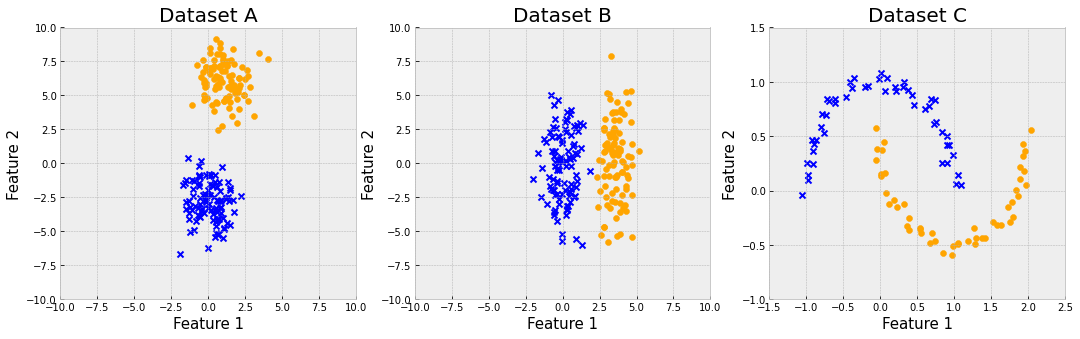

In [1]:
from IPython.display import Image
Image('figures/2-D-datasets.png',width=800)

**For each dataset (A, B and C), address each of the following two questions:**

1. (2.5 points) **Will PCA be effective at keeping the two clusters separated in the 1-D projection? Why or why not? If yes, state what characteristics of the dataset allow PCA to be effective. If no, state what characteristics of the dataset cause PCA to fail.**

2. (2.5 points) **Can you think of another dimensionality reduction technique that would be successful at reducing the dimensionality for this dataset while maintaining (or increase) class separability? State the other method and describe why it would be successful.**

| Dataset | PCA Effective? | Reasoning |
|---------|---------------|-----------|
| A (Vertical Clusters) | Yes | - Clusters well-separated vertically<br>- Direction of maximum variance aligns with class separation | 
| B (Diagonal Clusters) | Yes | - Clusters separated along diagonal<br>- Maximum variance aligns with diagonal separation | 
| C (Concentric Circles) | No | - Non-linear relationship between clusters<br>- Linear projection will mix classes | 

**Recommended Method: Linear Discriminant Analysis (LDA)**

Why LDA would be successful:
1. LDA is supervised, unlike PCA, so it explicitly considers class labels
2. It maximizes between-class separation while minimizing within-class scatter
3. For a 3D to 2D reduction, LDA would find the optimal projection directions that maximize class discrimination
4. While PCA focuses on variance ($\lambda_i$), LDA would focus on class separability

**Advantages over PCA:**
- PCA might discard discriminative information if it's not aligned with high variance
- LDA's projection would be optimized specifically for classification
- More likely to maintain or improve class separation in the reduced space

# Exercise 5 (5 points)

**Consider the data matrix $\mathbf{X}$ of size $3\times N$, where $N$ is the number of samples. The covariance matrix $\mathbf{K}$, of size $3\times 3$ has 3 eigenvectors $v_1=[-0.6, 0.8, 0]^T$, $v_2=[0,0,1]^T$ and $v_3=[0.8, 0.6, 0]^T$ with eigenvalues $\lambda_1=2.5$, $\lambda_2=0.5$ and $\lambda_3=3$, respectively. Answer the following questions:**

1. (2 points) **What linear transformation would you use to uncorrelate the data $\mathbf{X}$? Provide a numerical solution and justify your answer.**

2. (1 point) **Use Principal Component Analysis (PCA) to project the 3-dimensional space to a 2-dimensional space. Define the linear transformation (using a numerical answer).**

3. (1 point) **What is the amount of explained variance of this 2-D projection? Show your work.**

4. (1 point) **Let $\mathbf{Y}$ be the data (linear) transformation obtained by principal component transform of $\mathbf{X}$ onto a 2-dimensional space. What is resulting covariance matrix of transformed data $\mathbf{Y}$? Use a numerical answer and justify your answer.**

1. Linear transformation to uncorrelate X:
$$W = \begin{bmatrix} 
0.8 & 0 & -0.6 \\
0.6 & 0 & 0.8 \\
0 & 1 & 0
\end{bmatrix}$$

2. PCA projection matrix to 2D:
$$W_{2D} = \begin{bmatrix} 
0.8 & 0 \\
0.6 & 0 \\
0 & 1
\end{bmatrix}$$

3. Explained variance:
   - Total variance = $\lambda_3 + \lambda_1 + \lambda_2 = 3.0 + 2.5 + 0.5 = 6.0$
   - Variance kept = $\lambda_3 + \lambda_1 = 3.0 + 2.5 = 5.5$
   - Explained variance ratio = $\frac{5.5}{6.0} = 0.917 = 91.7\%$

4. Covariance matrix of transformed data Y:
$$Y = \begin{bmatrix}
3.0 & 0 \\
0 & 2.5
\end{bmatrix}$$

---

# Exercise 6 (5 points)

**Consider fitting an SVM with $C > 0$ to a dataset that is linearly separable. Is the resulting decision boundary guaranteed to separate the classes?**

No, soft-margin SVM $(C > 0)$ is NOT guaranteed to linearly separate the classes, even when the data is linearly separable.


---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___